## Pattern recognition: Lab 7
### Tasks:
* Plot the error
* Model XOR with the help of sigmoid
* Add moments rule to learning equation


In [2]:
import numpy as np

k = 1
def sigmoid(x):
    return 1.0/(1.0 + np.exp(-k*x))

def sigmoid_prime(x):
    return x*(1.0-x)

def tanh(x):
    return np.tanh(x)

def tanh_prime(x):
    return 1.0 - x**2


[array([[ 0.78157707, -0.34177527,  0.34505799],
       [-0.71168369, -0.11954192,  0.02781269],
       [-0.3081982 , -0.76741339, -0.57675961]]), array([[-0.22119793],
       [ 0.90321912],
       [ 0.98052792]])]
epochs: 0
epochs: 10000
epochs: 20000
epochs: 30000
epochs: 40000
epochs: 50000
epochs: 60000
epochs: 70000
epochs: 80000
epochs: 90000


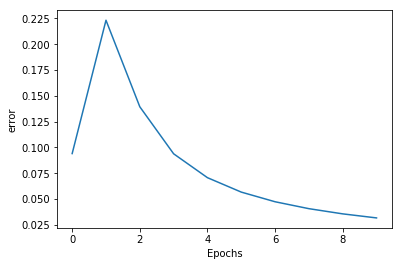

[0 0] [ 0.01432335]
[0 1] [ 0.98026411]
[1 0] [ 0.98415301]
[1 1] [ 0.0185317]


In [4]:
import numpy as np
import matplotlib.pyplot as plt

#define activation functions and their derivatives
def sigmoid(x):
    return 1.0/(1.0 + np.exp(-x))

def sigmoid_prime(x):
    return x*(1.0-x)

def tanh(x):
    return np.tanh(x)

def tanh_prime(x):
    return 1.0 - (x)**2


class NeuralNetwork:

    def __init__(self, layers):
        self.errors = []
        self.activation = sigmoid
        self.activation_prime = sigmoid_prime

        # Set weights
        self.weights = []
        # layers = [2,2,1]
        # range of weight values (-1,1)
        # input and hidden layers - random((2+1, 2+1)) : 3 x 3
        for i in range(1, len(layers) - 1):
            r = 2*np.random.random((layers[i-1] + 1, layers[i] + 1)) -1
            self.weights.append(r)
           
            # output layer - random((2+1, 1)) : 3 x 1
            r = 2*np.random.random( (layers[i]+1 , layers[i+1])) -1
            self.weights.append(r)
        print(self.weights) 
    def fit(self, X, y, learning_rate=0.2, epochs=100000 ,momentum = 0.2):
        # Add column of ones to X
        # This is to add the bias unit to the input layer
        errors=[]
        average = []
        ones = np.atleast_2d(np.ones(X.shape[0]))
        
        X = np.concatenate((ones.T, X), axis=1)
        
        for k in range(epochs):
            i = np.random.randint(X.shape[0])
            
            a = [X[i]]
            
            for l in range(len(self.weights)):
                    dot_value = np.dot(a[l], self.weights[l])
                    
                    activation = self.activation(dot_value)
                    a.append(activation)
            # output layer
            error = y[i] - a[-1]
            #self.errors.append(error**2)/(k)
            errors.append((error**2))
            deltas = [error * self.activation_prime(a[-1])]
            #plt.plot(deltas)
            #plt.axis()
            # we need to begin at the second to last layer 
            # (a layer before the output layer)
            for l in range(len(a) - 2, 0, -1): 
                deltas.append(deltas[-1].dot(self.weights[l].T)*self.activation_prime(a[l]))

            # reverse
            # [level3(output)->level2(hidden)]  => [level2(hidden)->level3(output)]
            deltas.reverse()

            # backpropagation
            # 1. Multiply its output delta and input activation 
            #    to get the gradient of the weight.
            # 2. Subtract a ratio (percentage) of the gradient from the weight.
            pr_weights_delta = []
            pr_3_1 = np.zeros((3,1))
            pr_3_3 = np.zeros((3,3))
            pr_weights_delta.append(pr_3_3)
            pr_weights_delta.append(pr_3_1)
            
            for i in range(len(self.weights)):
                layer = np.atleast_2d(a[i])
                delta = np.atleast_2d(deltas[i])
                delta = learning_rate * (layer.T.dot(delta)-(momentum * pr_weighqw0ts_delta[i]))
                self.weights[i] += delta
                self.weights[i] += momentum * pr_weights_delta[i]
                pr_weights_delta[i] = delta
            if k % 10000 == 0: 
                print('epochs:', k)
                t = np.average(errors)
                average.append(t)
        plt.plot(average)
        plt.xlabel('Epochs')
        plt.ylabel('error')
        plt.show()       
        #plt.plot(delta)
        #plt.show()
            
    def predict(self, x): 
    
        a = np.concatenate((np.ones(1).T, np.array(x)))      
#          print(a)
        for l in range(0, len(self.weights)):
            a = self.activation(np.dot(a, self.weights[l]))
        return a

if __name__ == '__main__':

    nn = NeuralNetwork([2,2,1])
    X = np.array([[0, 0],
                  [0, 1],
                  [1, 0],
                  [1, 1]])
    y = np.array([0, 1, 1, 0])
    nn.fit(X, y)
    for e in X:
        print(e,nn.predict(e))

epochs: 0
epochs: 10000
epochs: 20000
epochs: 30000
epochs: 40000
epochs: 50000
epochs: 60000
epochs: 70000
epochs: 80000
epochs: 90000
[0 0] [ 0.00010151]
[0 1] [ 0.99664479]
[1 0] [ 0.99663044]
[1 1] [  3.85971824e-05]
